Total Household Income
76927
Total Food Expenditure
27107.5
Restaurant and hotels Expenditure
0
Alcoholic Beverages Expenditure
90
Tobacco Expenditure
0
Fashion Spendings
4317
Housing Expenditure
15438
Medical Expenditure
776
Transportation Expenditure
1056
Communication Expenditure
1560
Education Expenditure
0
Farming and Gardening expenses
0
Miscellaneous and Special Occasions Expenditure
4756
0 = Female & 1 = Male
1
Age
61
Single = 0, Married = 1, Widowed = 2, Divorced/Separated = 3, Annulled = 4, Unknown = 5
1
Total Number of Family members
2
Current Savings Value: 21826.5


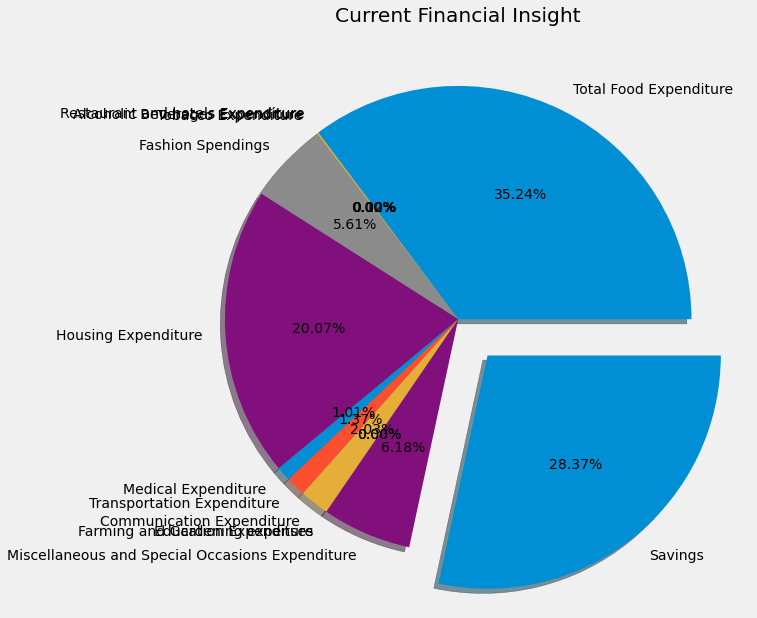

Your Savings will be 21276.09 due to Inflation.
It is a concern in fashion
You can save 1522.92 in fashion expenditure
It is a concern in house
You can save 7935.8 in house expenditure
You can save 9458.72 in the above expenditure:
You can save a total Of 31285.22 from your salary.


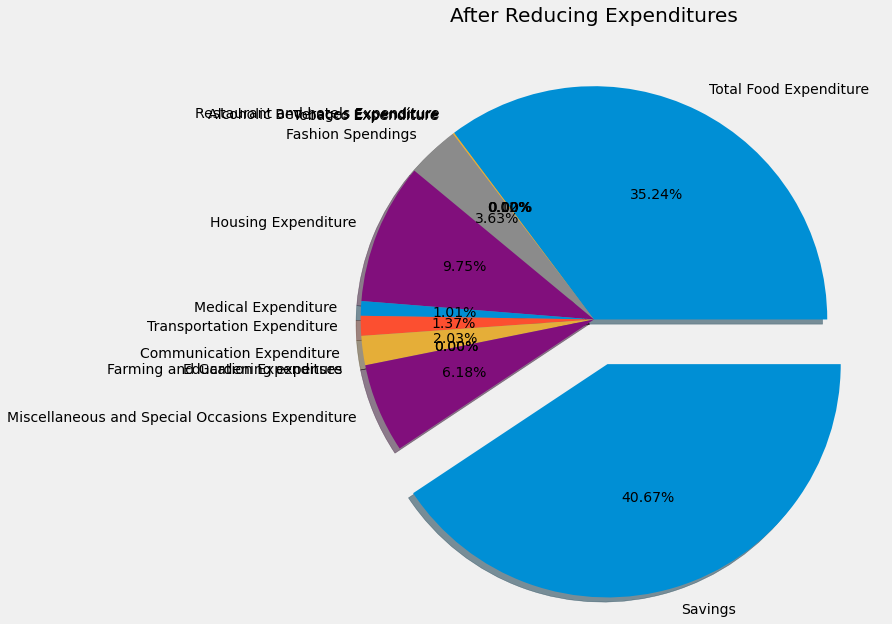

What is your risk taking apettite for your funds?
0 : No Risk Very Low Return
1 : Low Risk Low Return
2 : Medium Risk Medium Return
3 : High Risk High Return
Enter Corresponsing Number : 1
How much you want to invest?
Enter Ammount : 800
       Stock  Closing Price
0        ITC      213.74490
1  KOTAKBANK      677.82513
2      WIPRO      273.10916
3    YESBANK      185.07762


In [1]:
import warnings
warnings.filterwarnings("ignore")
import math
import os
import glob
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import pandas_datareader as web
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import joblib as jb

model = jb.load("MLR_Training.pkl")
MeanPercentDict = jb.load("MeanPercentDict.pkl")
expenditure_names = jb.load("expenditure_names.pkl")

test1 = []

for i in expenditure_names:
    if i == 'Sex':
        print("0 = Female & 1 = Male")
        test1.append(int(input()))
    elif i == 'Marital Status':
        print("Single = 0, Married = 1, Widowed = 2, Divorced/Separated = 3, Annulled = 4, Unknown = 5")
        test1.append(int(input()))
    else:    
        print(i)
        test1.append(float(input()))
    
expenditure_names.pop(0)
for i in range(4):
    expenditure_names.pop()
    
expenditure_names.append('Savings')



test1 = np.array(test1)
test1 = test1.reshape(1, -1) #make 1d array to 2d
#print(test1)

test1_pred1 = model.predict(test1)
test1_pred1 = test1_pred1[0]
print("Current Savings Value:",round(test1_pred1,2))

test1v1 = list(test1.flatten()) #2d to 1d conversion
#np.append(test1v3,round(test1_pred1[0],2))
test1v1.pop(0)
for i in range(4):
    test1v1.pop()
#print(L)
test1v1.append(test1_pred1)
#print(len(expenditure_names))


#Plotting Population mean data
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2]
fig = plt.figure(figsize =(30, 10))
plt.title("Current Financial Insight")
plt.pie(test1v1, labels = expenditure_names,autopct='%1.2f%%', explode = explode, shadow = True, radius = 1)
#plt.legend(loc = 0)
plt.show()

PurchasePower = round((test1_pred1/ (1+0.02587)**1),2)

print("Your Savings will be {} due to Inflation.".format(PurchasePower))

test1v2 = test1
threshold = jb.load("threshold.pkl")
i = 0
delSave = 0
totalsave = 0
flag = 0

for key,value in MeanPercentDict.items():
    
    
    
    
    calc_per = test1v2[0][i]*100/test1v2[0][0]
    
    #print(calc_per)
    if calc_per >= MeanPercentDict[key] + threshold[key]:
        flag+=1
        print("It is a concern in",key[:-4])
        delSave = round((test1v2[0][i]) - (test1v2[0][0] * ((MeanPercentDict[key] + threshold[key])/100)), 2)
        test1v2[0][i] = test1v2[0][i] - delSave 
        print("You can save {} in {} expenditure".format(delSave,key[:-4]))
        totalsave = round(totalsave + delSave,2)
    i+=1
if flag>0:
    print("You can save {} in the above expenditure:".format(totalsave))
else:
    print("Your savings are good")
    
finalsave = totalsave + round(test1_pred1,2)
print("You can save a total Of {} from your salary.".format(finalsave))

test1v2 = list(test1v2.flatten()) #2d to 1d conversion
#np.append(test1v3,round(test1_pred1[0],2))
test1v2.pop(0)
for i in range(4):
    test1v2.pop()

    
test1v2.append(finalsave)    
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2]
fig = plt.figure(figsize =(30, 10))
plt.title("After Reducing Expenditures")
plt.pie(test1v2, labels = expenditure_names,autopct='%1.2f%%', explode = explode, shadow = True, radius = 1)
#plt.legend(loc = 0)
plt.show()

NoRisk = pd.read_csv("NoRisk.csv")
Risk = pd.read_csv('StockRisk.csv')
Close = pd.read_csv('StockClose.csv')

Risk['Risk'][Risk['Risk'] == 'Low'] = 1
Risk['Risk'][Risk['Risk'] == 'Medium'] = 2
Risk['Risk'][Risk['Risk'] == 'High'] = 3

print("What is your risk taking apettite for your funds?")

print("0 : No Risk Very Low Return\n1 : Low Risk Low Return\n2 : Medium Risk Medium Return\n3 : High Risk High Return")
risk = int(input("Enter Corresponsing Number : "))


if risk == 0:
    print(NoRisk)
else:
    print("How much you want to invest?")
    invest = int(input("Enter Ammount : "))

    Temp1 = pd.DataFrame((Risk['Stock'][Risk['Risk'] == risk]).reset_index(drop=True))
    Temp2 = pd.DataFrame((Close['Stock'][Close['Closing Price'] <= invest]).reset_index(drop=True))
    Result = pd.merge(pd.merge(Temp1,Temp2, how='inner'),Close, how='inner')
    print(Result) 
    
